In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from scipy.stats import norm, entropy

In [2]:
# df = pd.read_csv('https://drive.google.com/uc?export=download&id=1yyoTl6CQ3NshjNgOogYRdD68c9_NeOXa')
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1i-JbDm2nY15NnYl62GxlsBCoELp1HJZ3")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


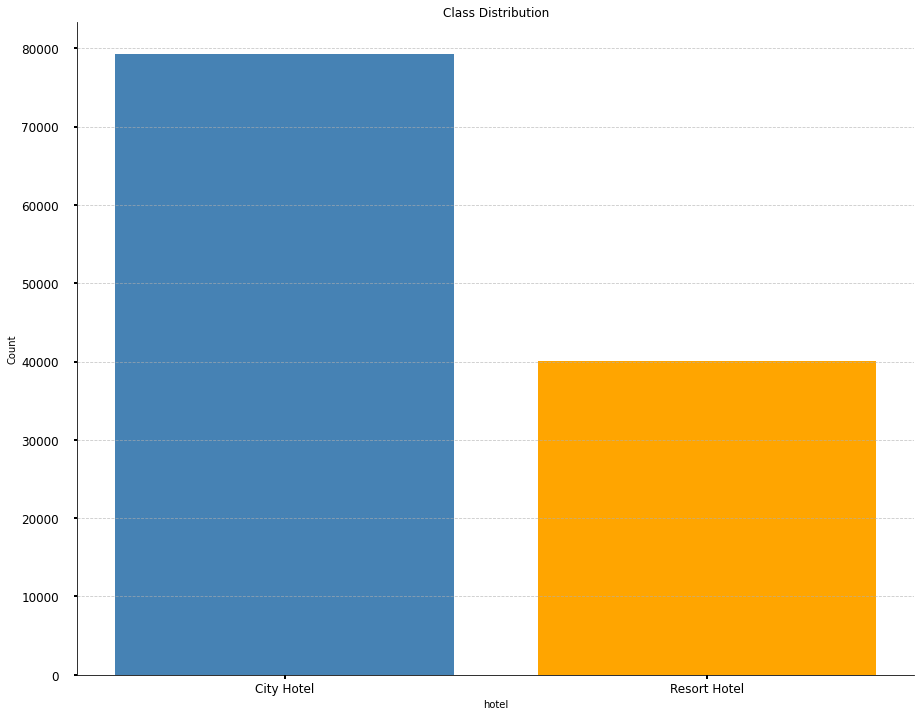

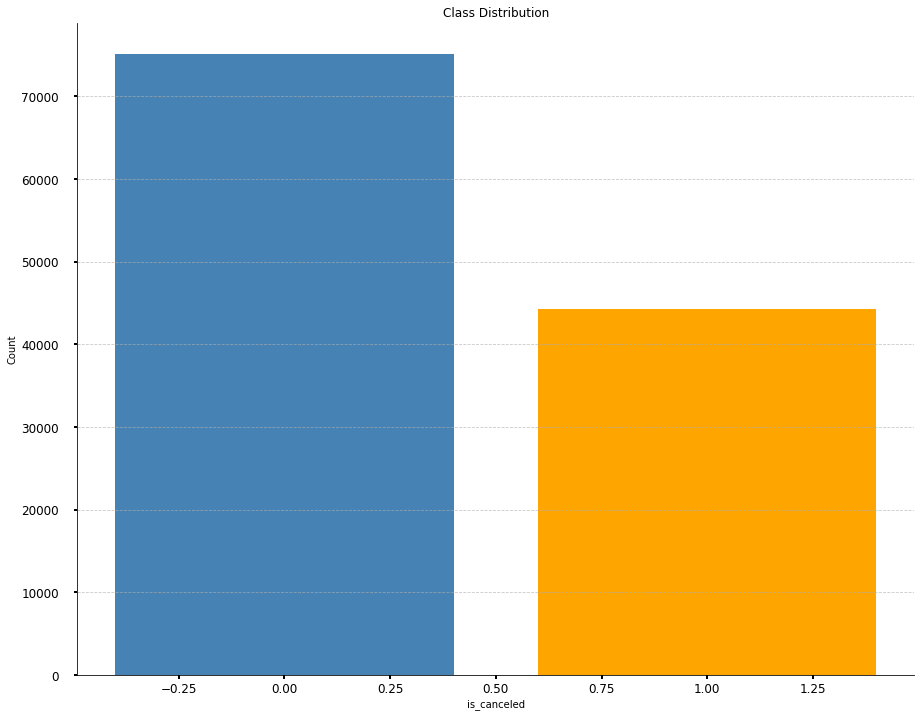

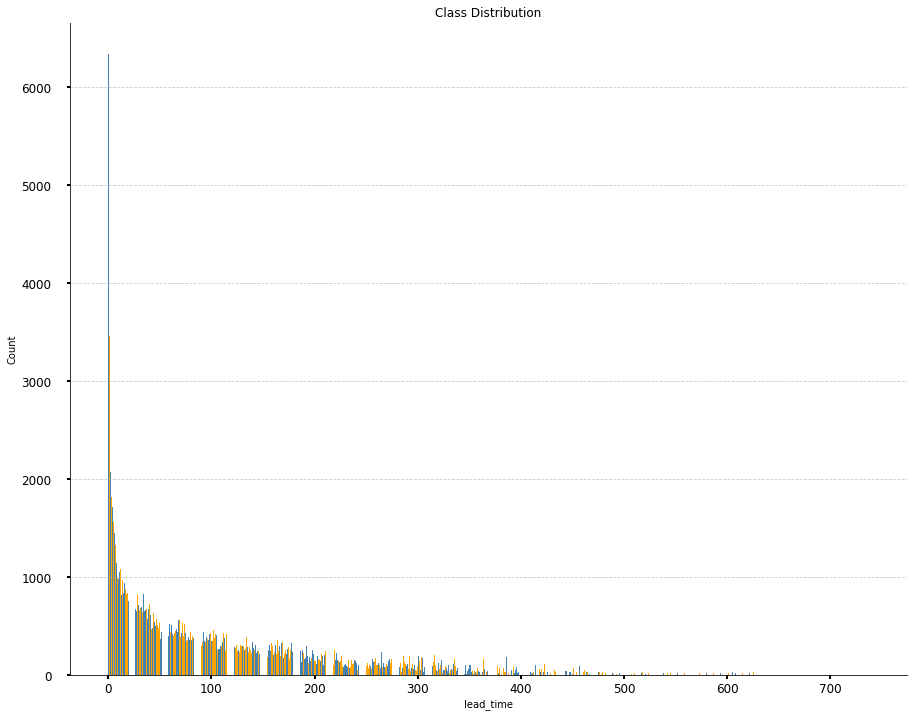

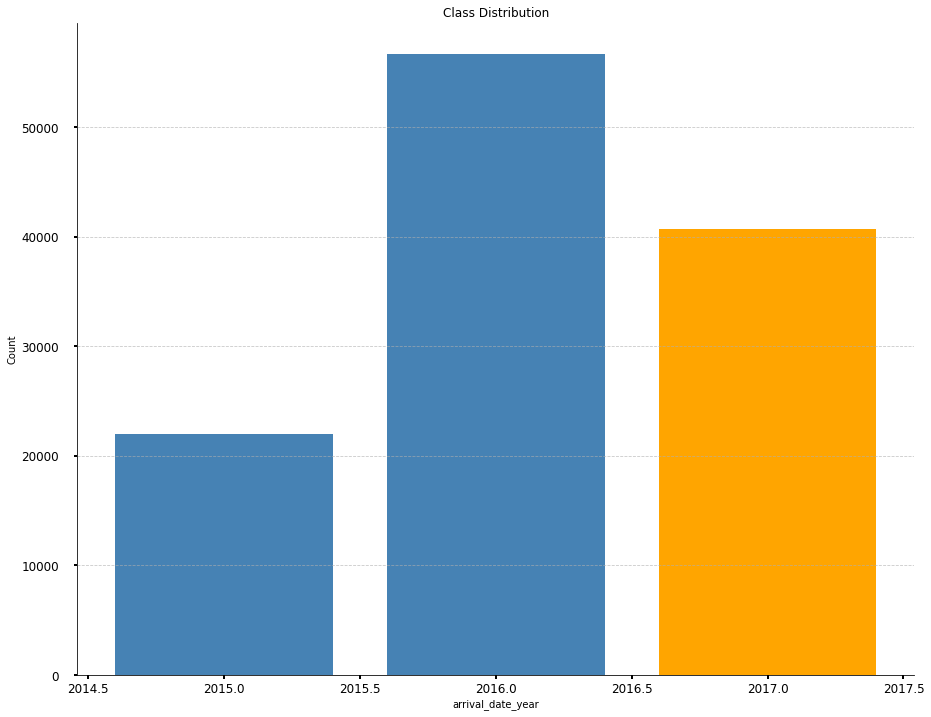

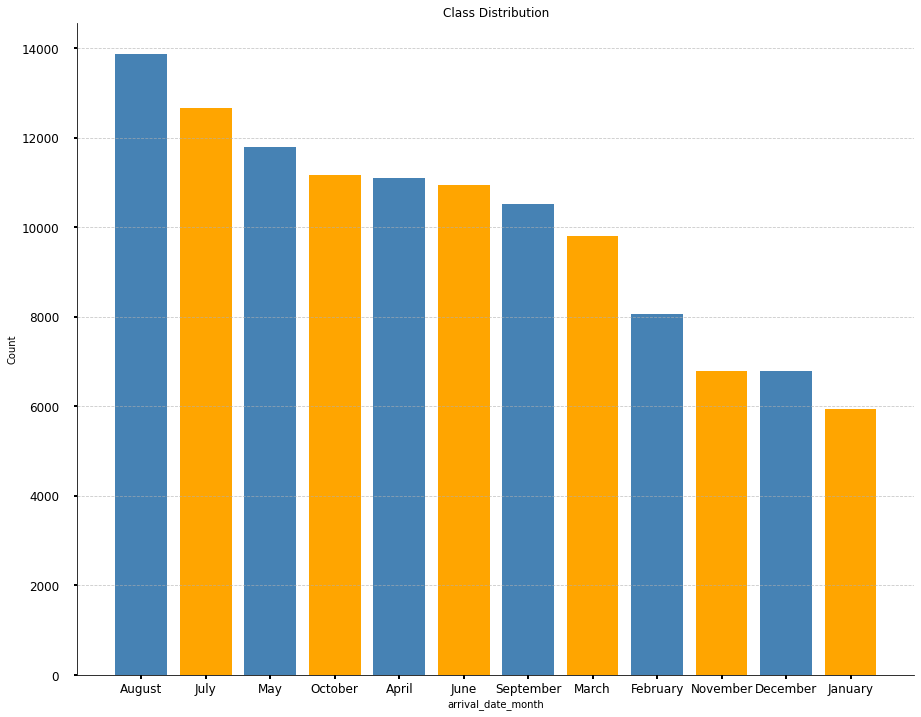

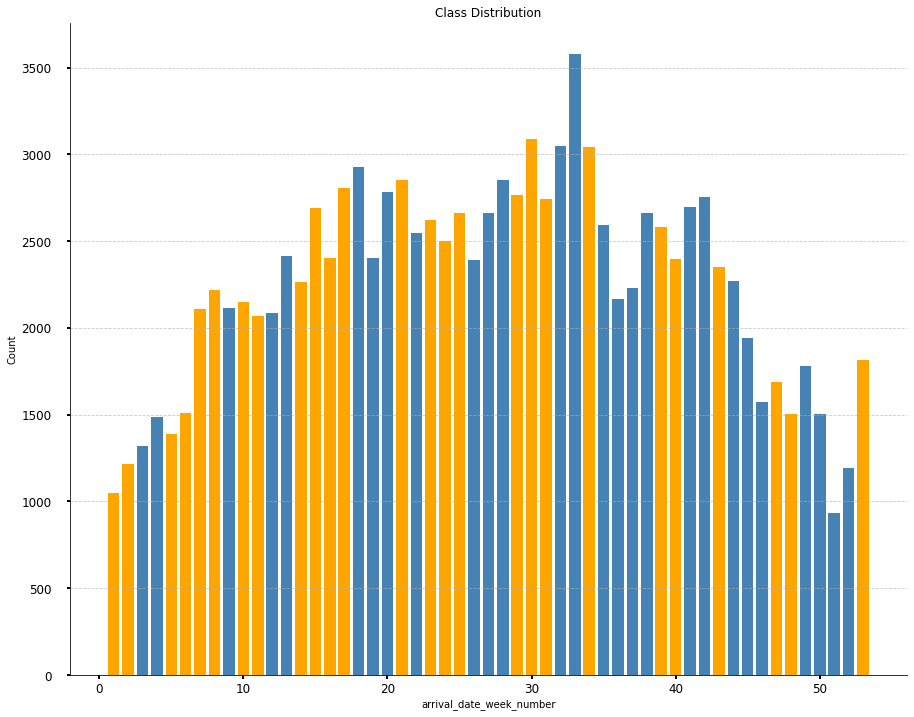

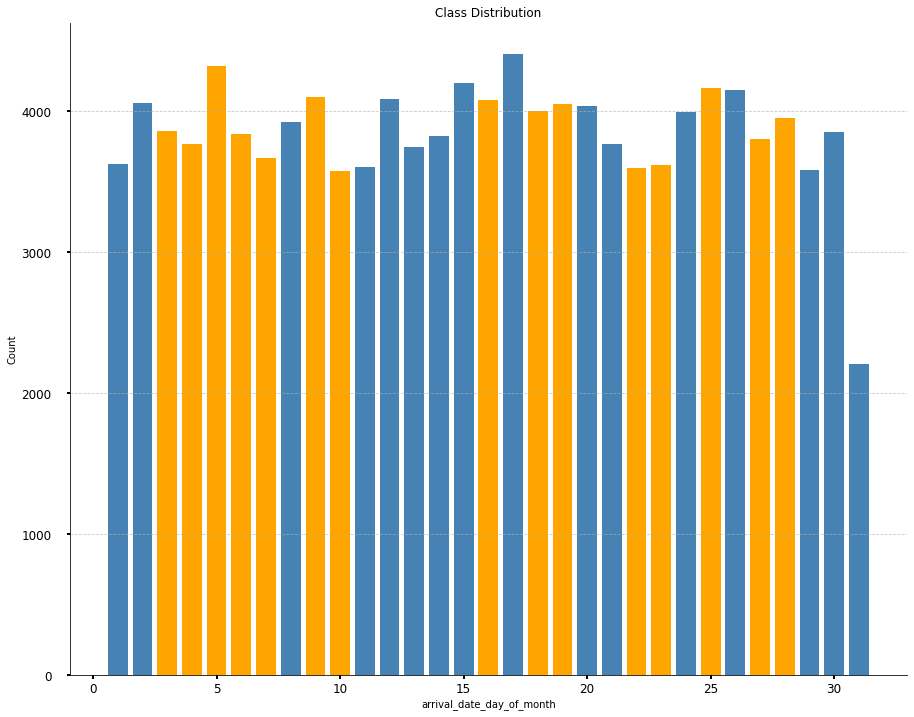

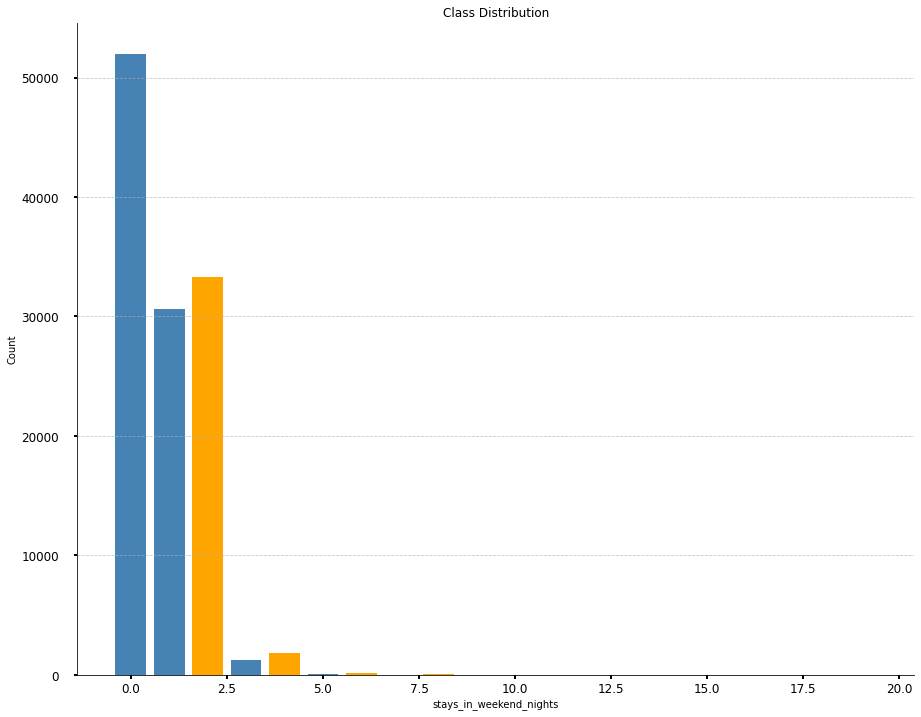

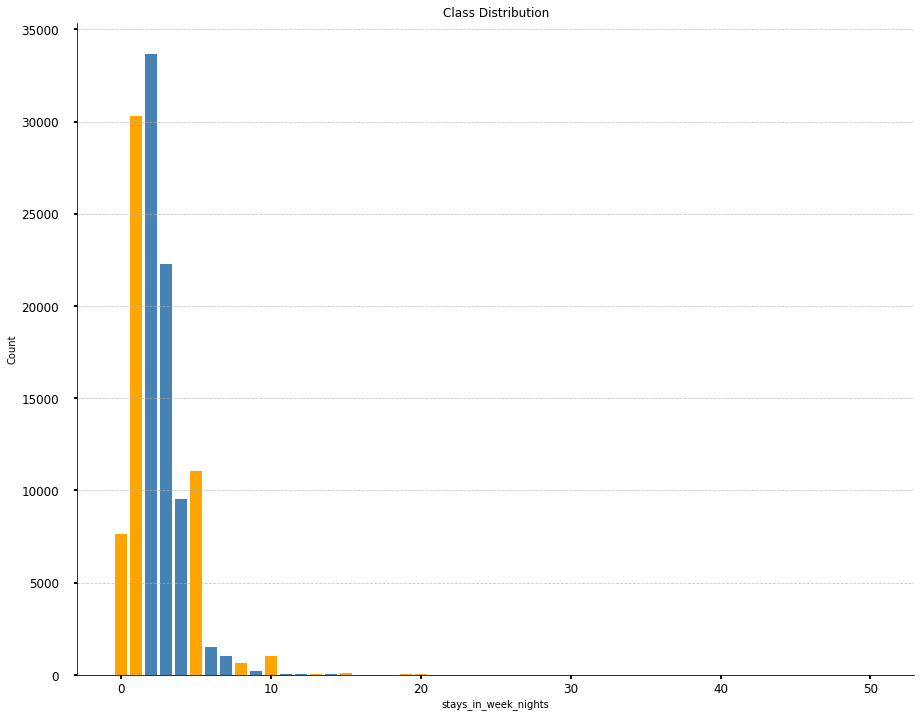

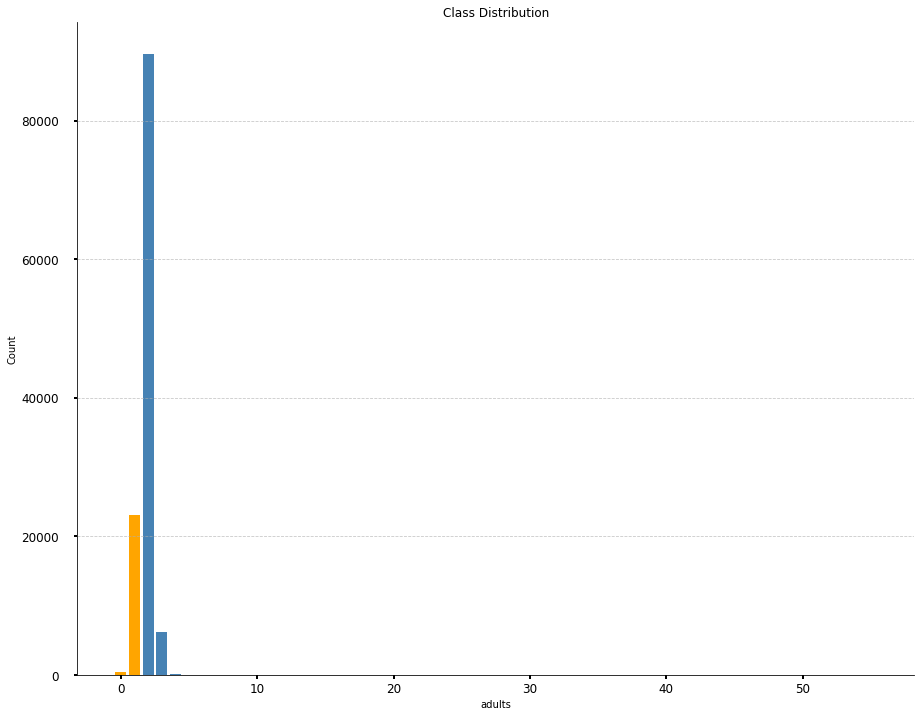

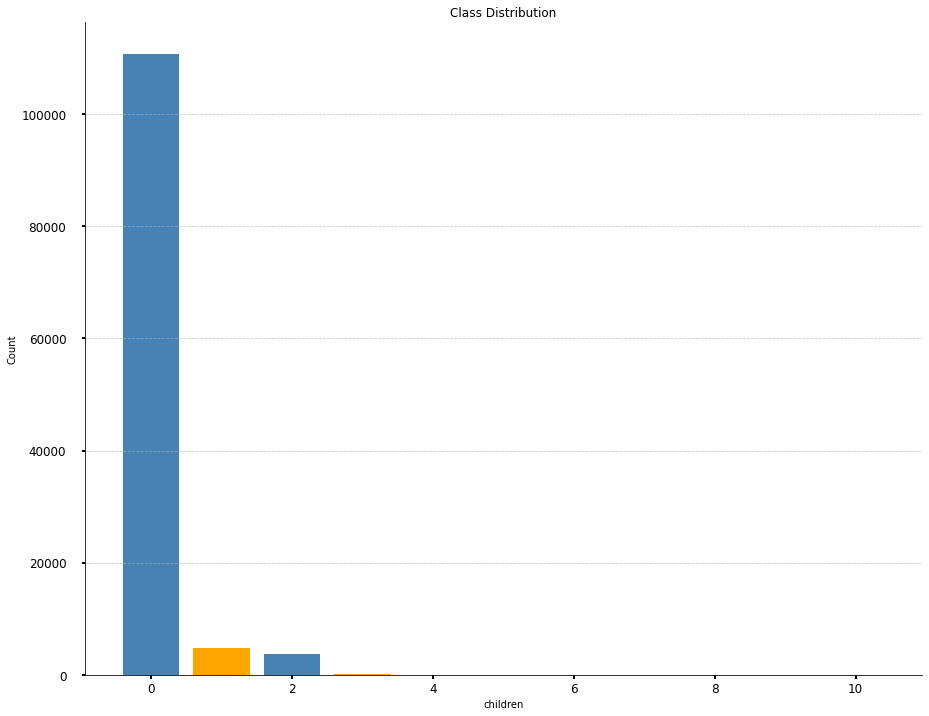

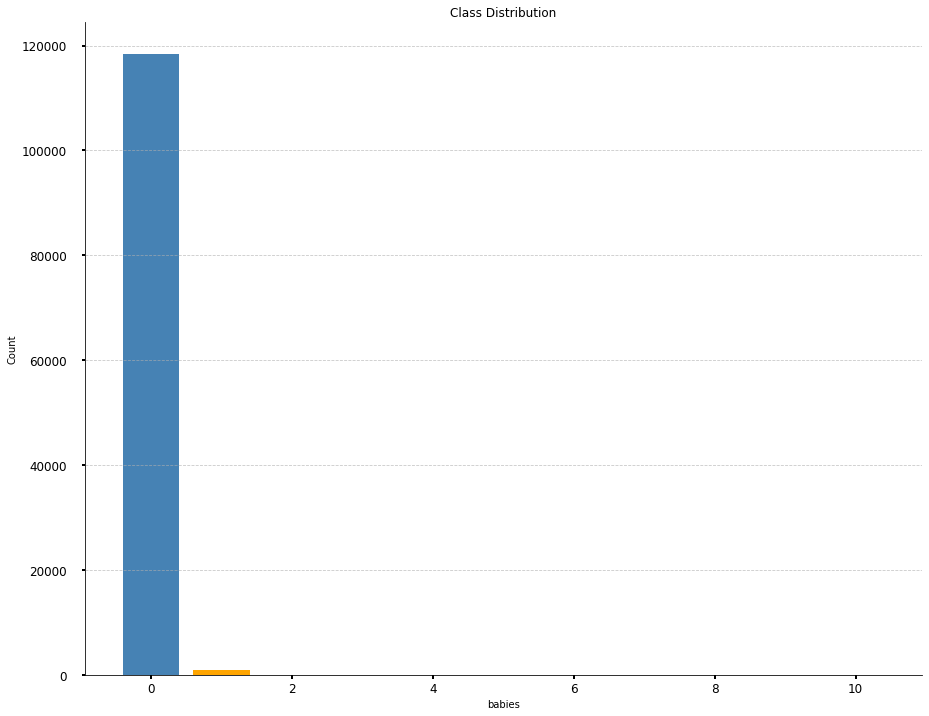

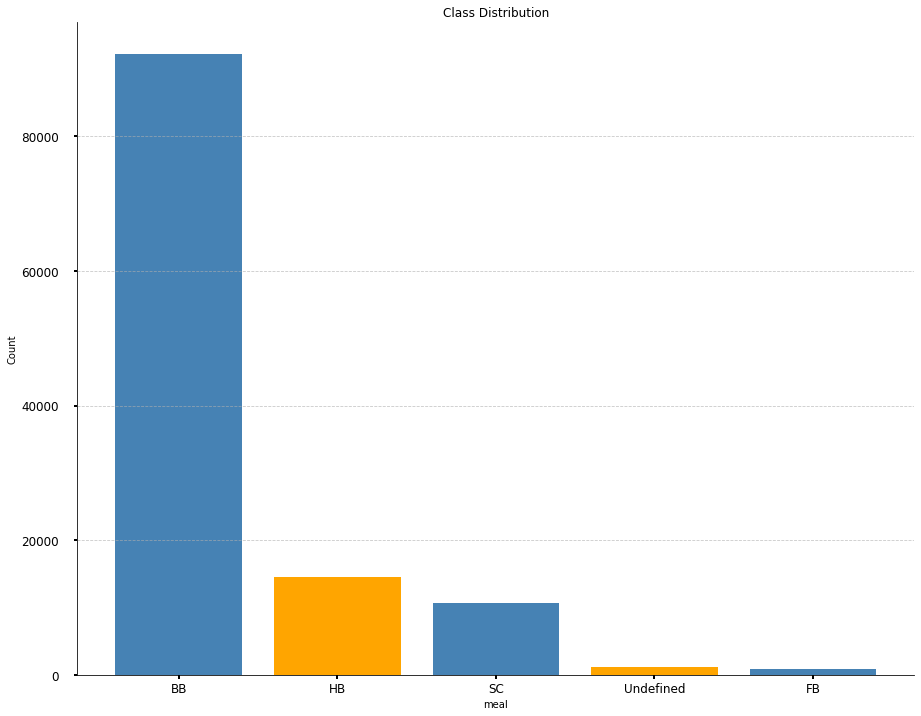

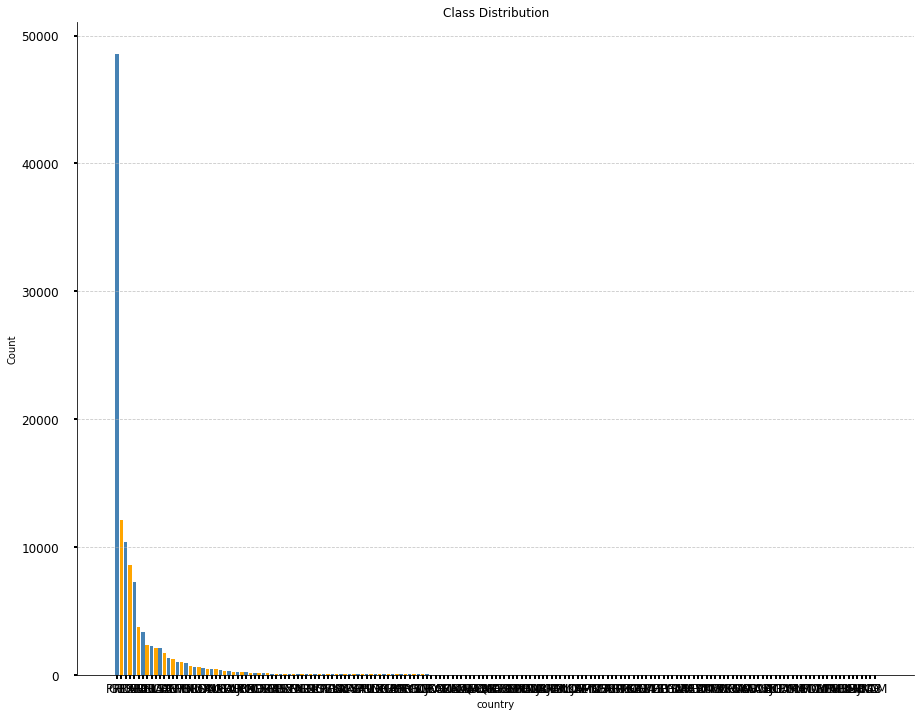

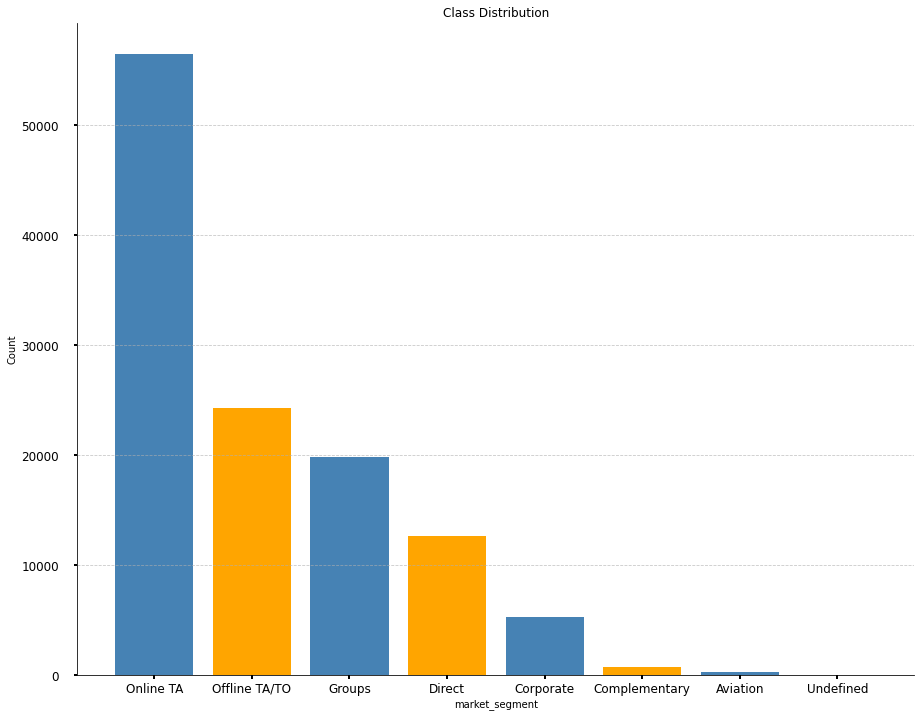

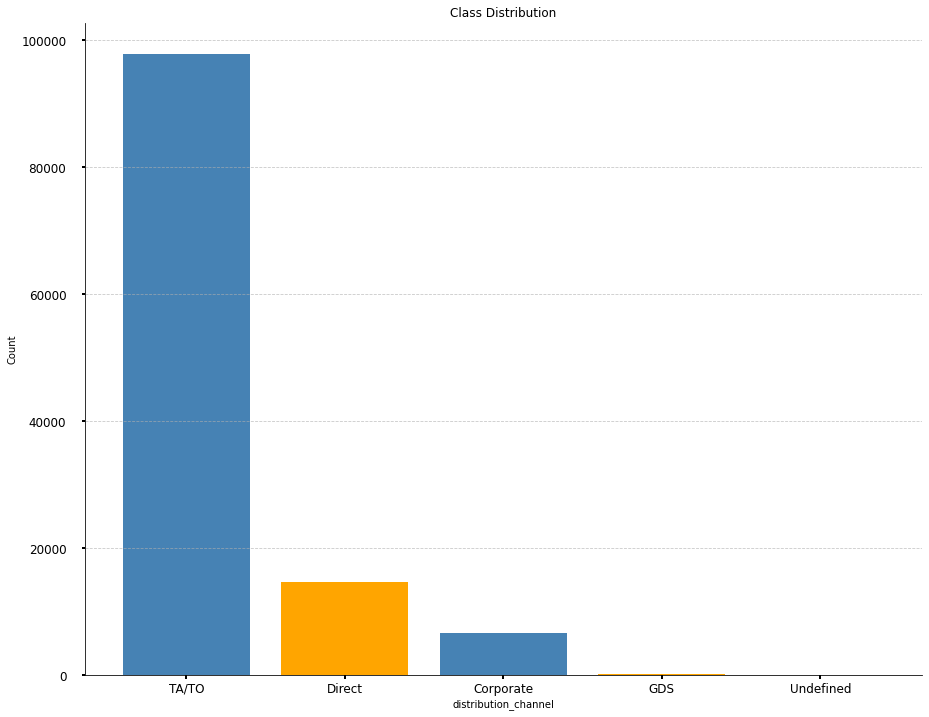

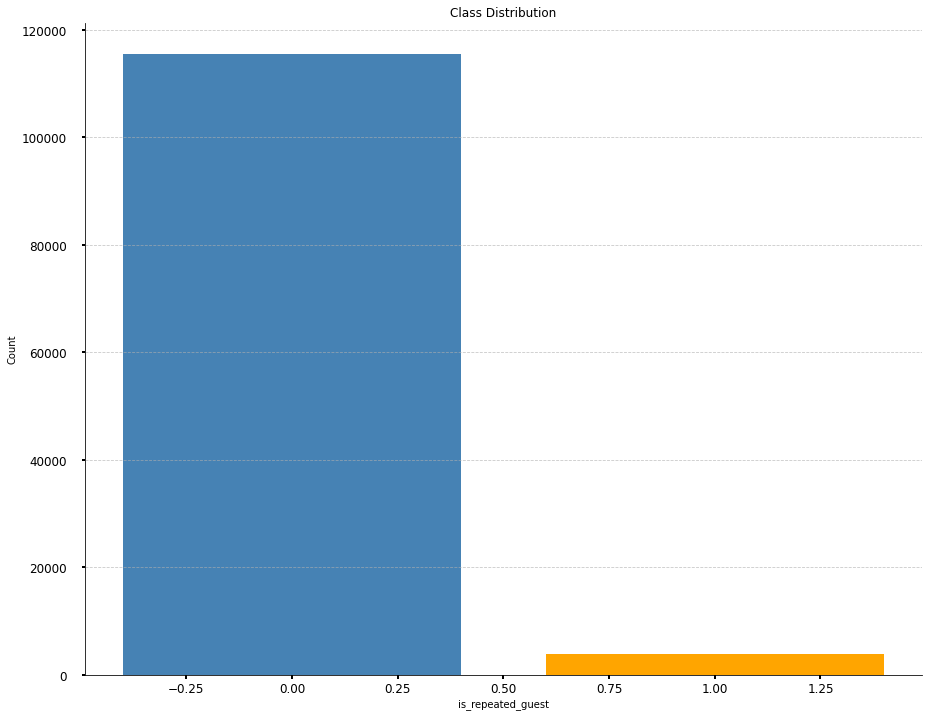

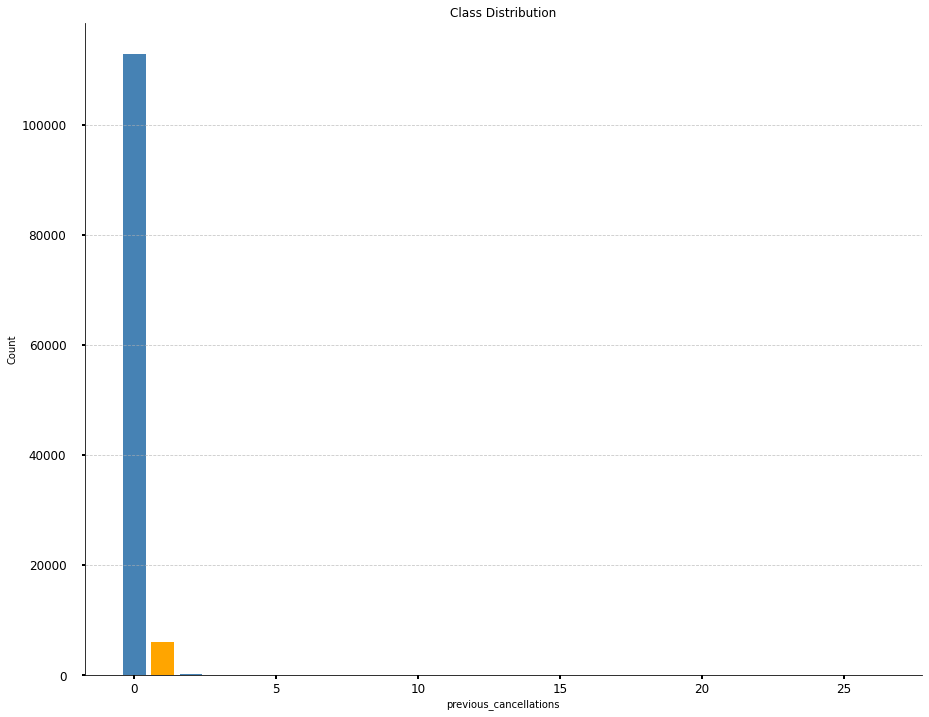

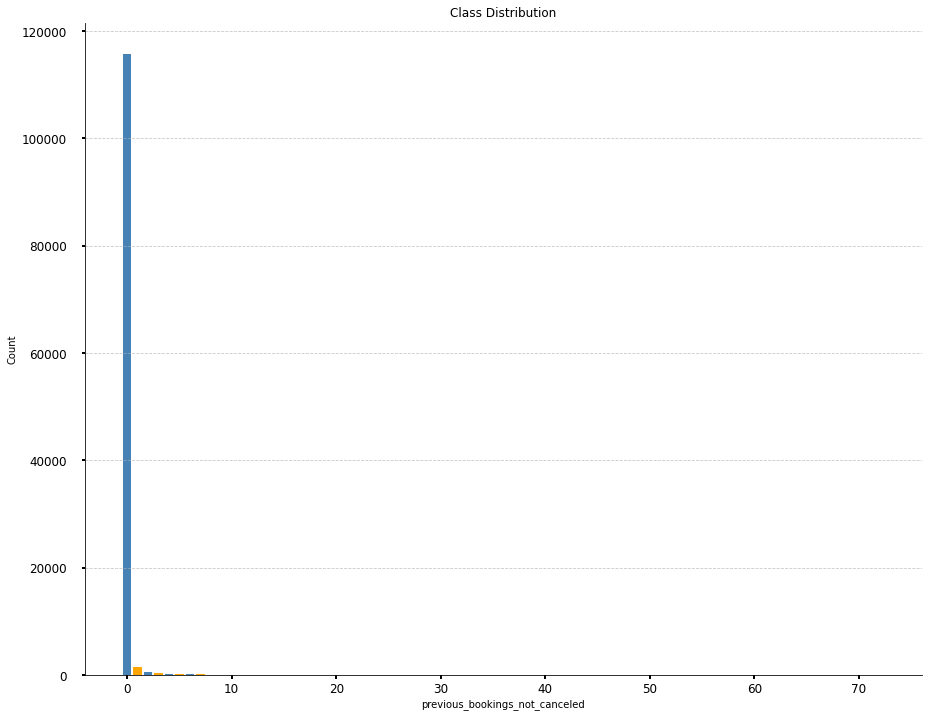

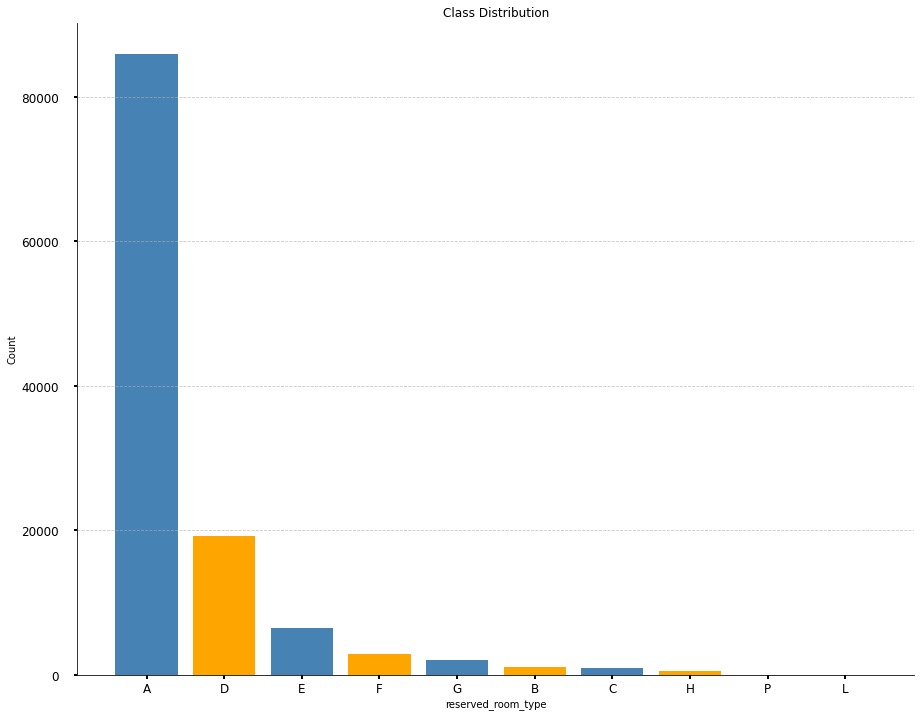

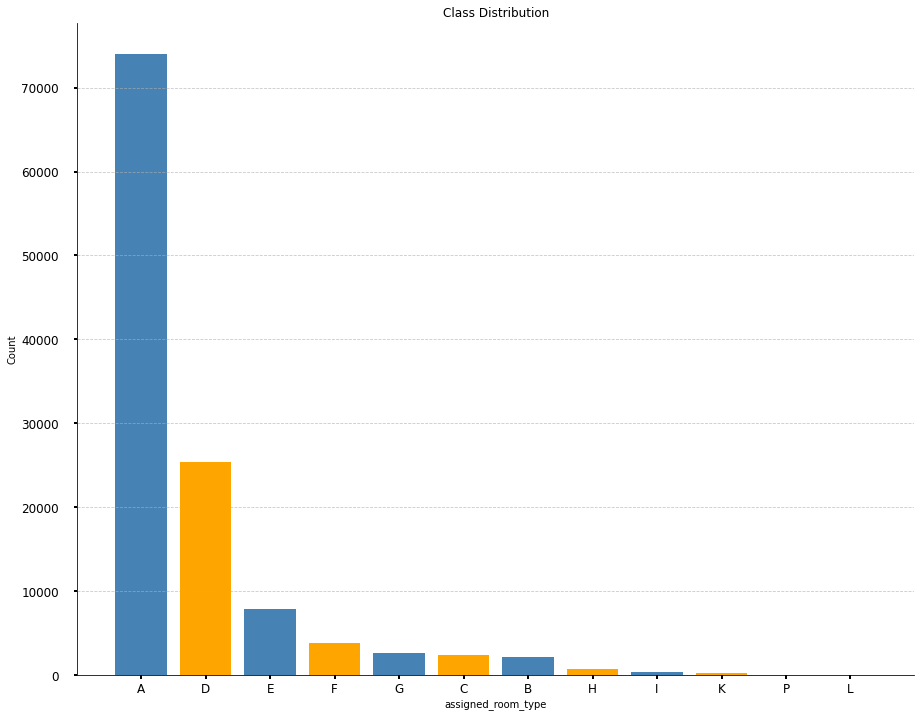

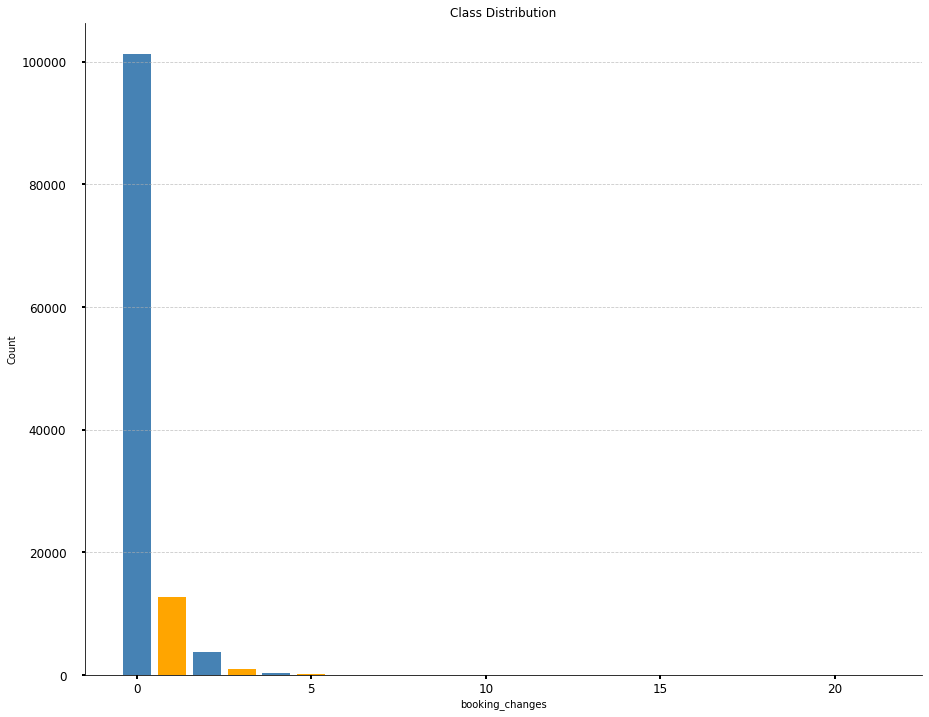

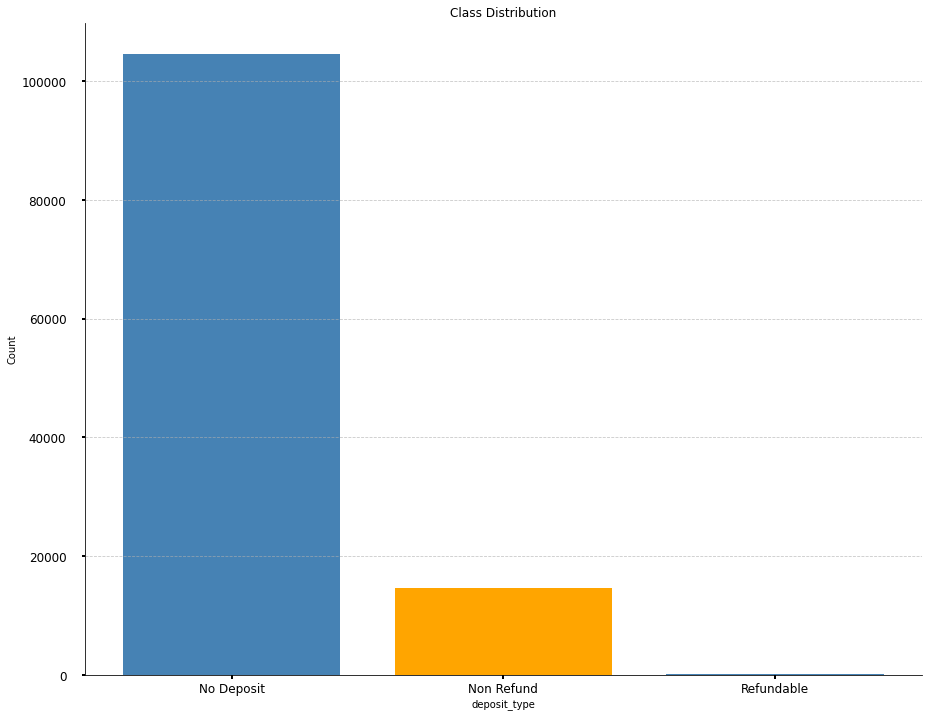

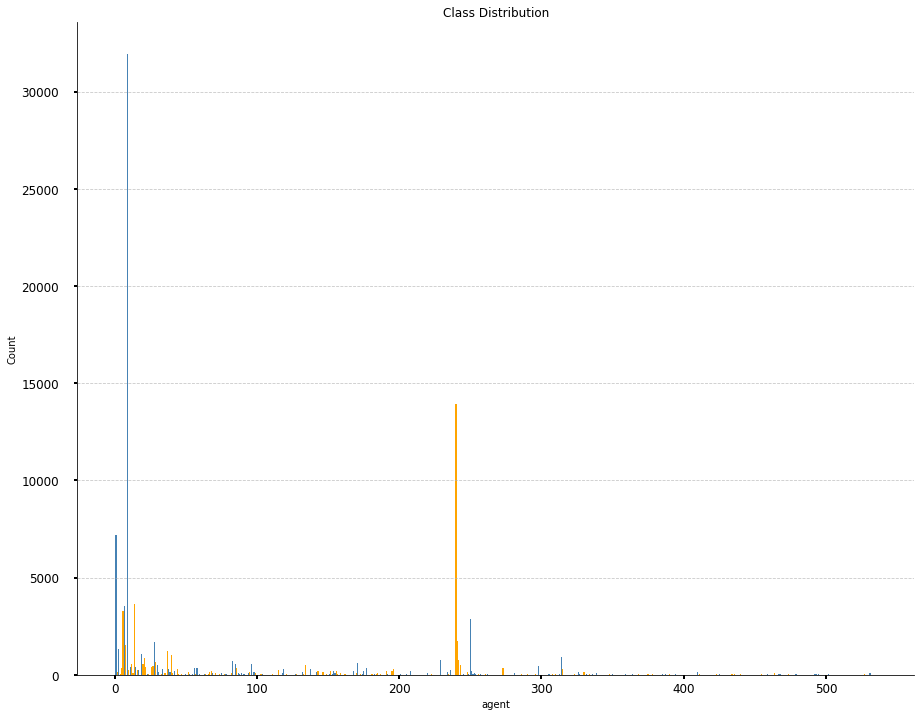

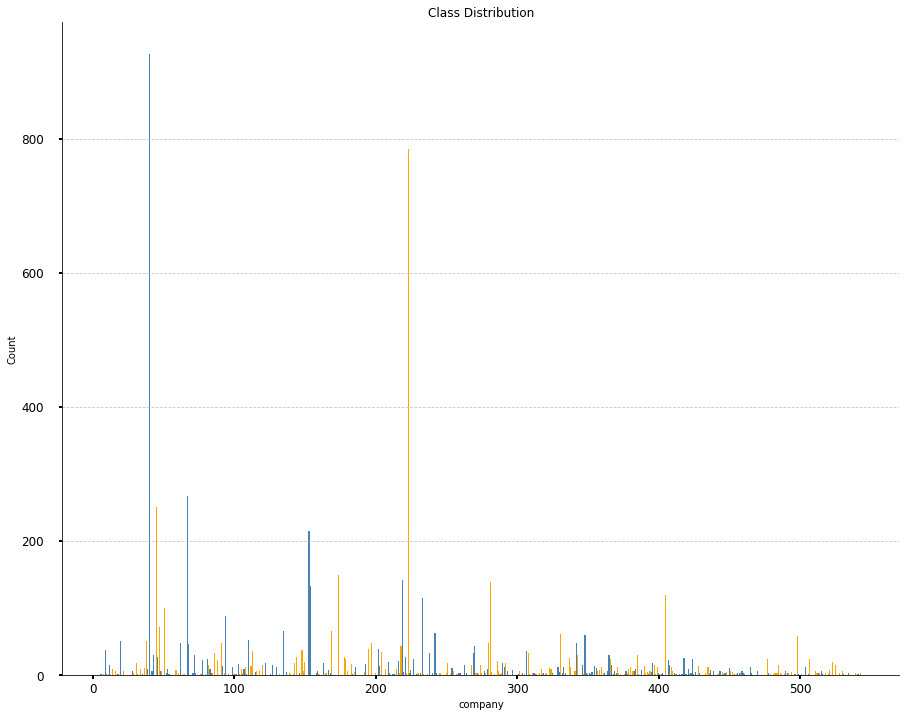

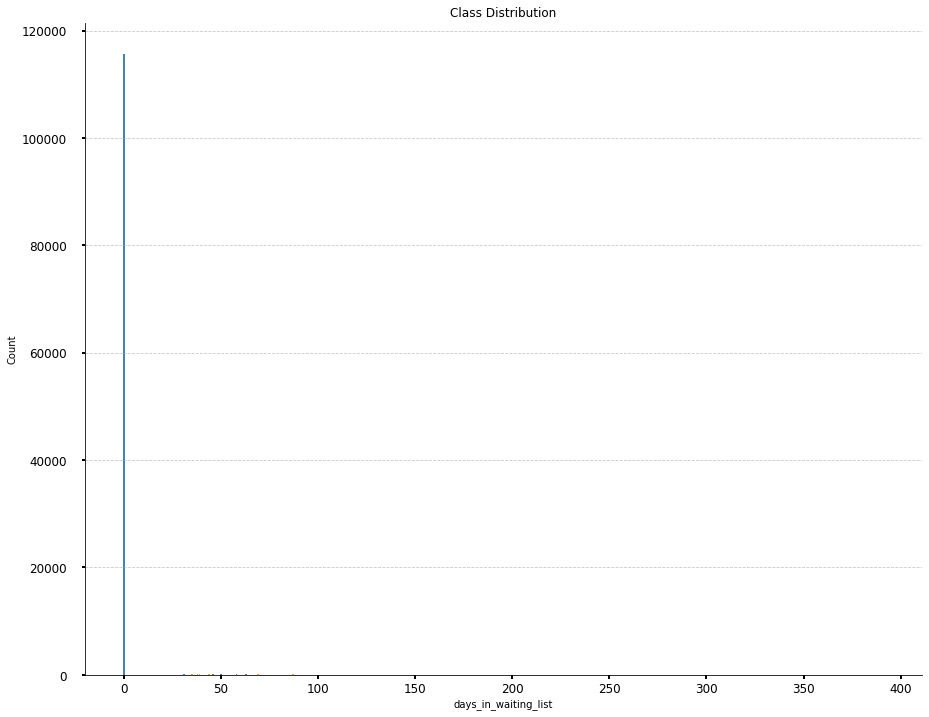

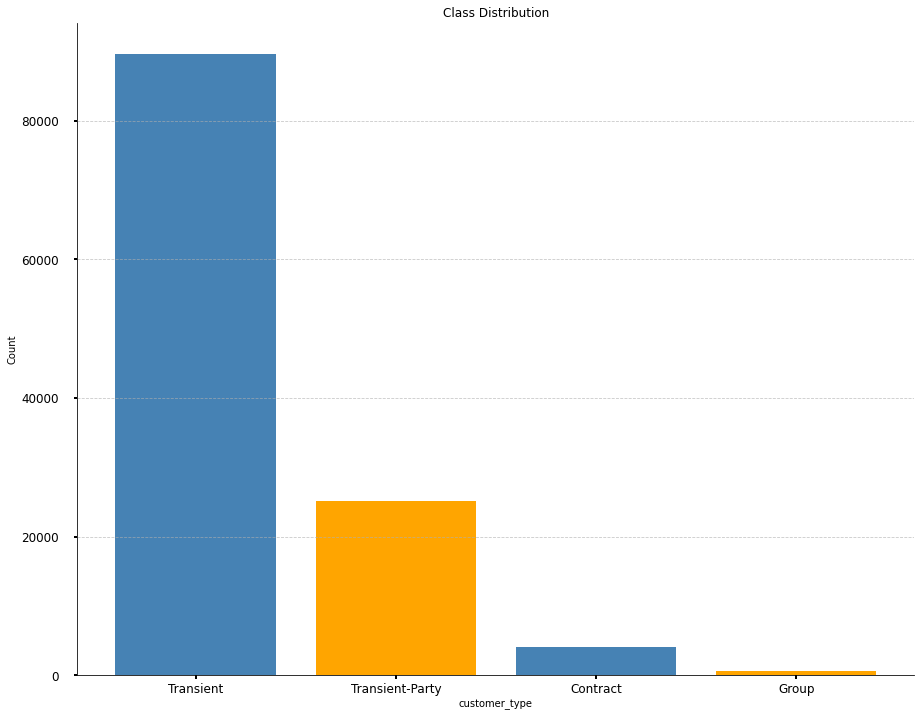

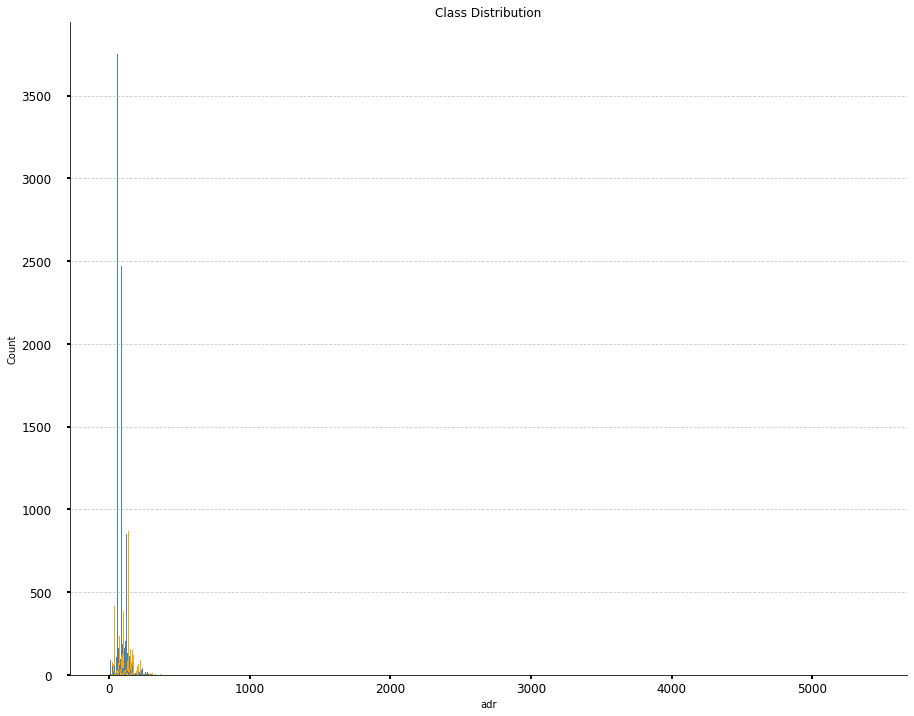

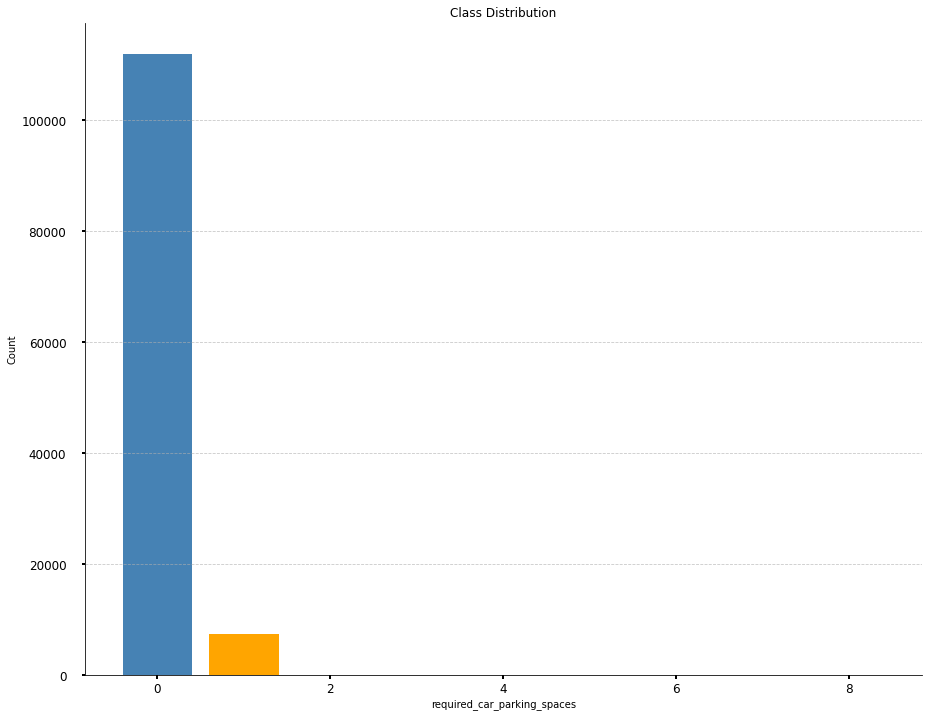

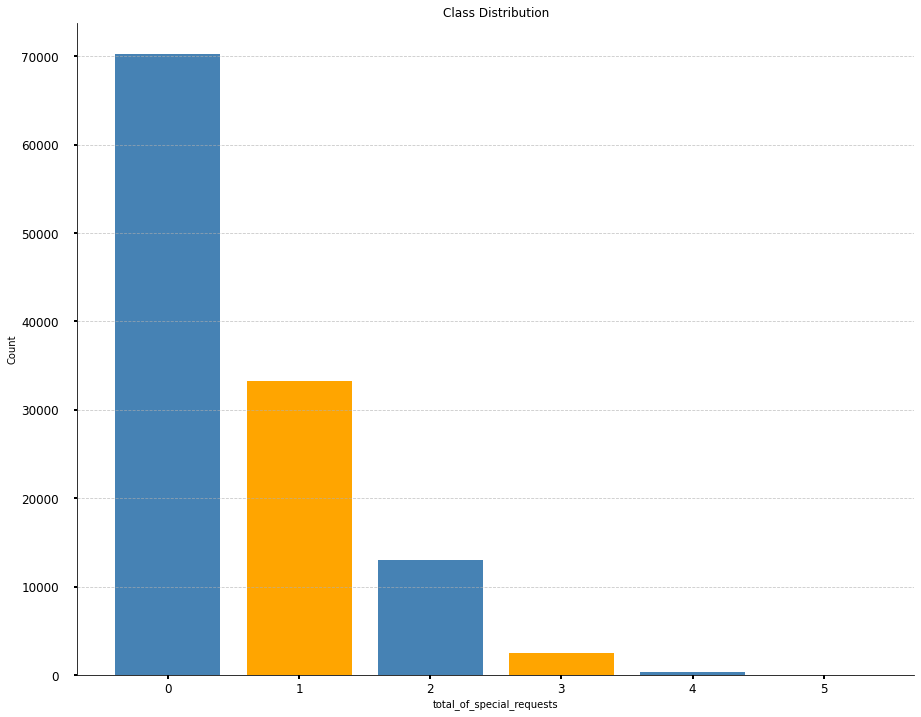

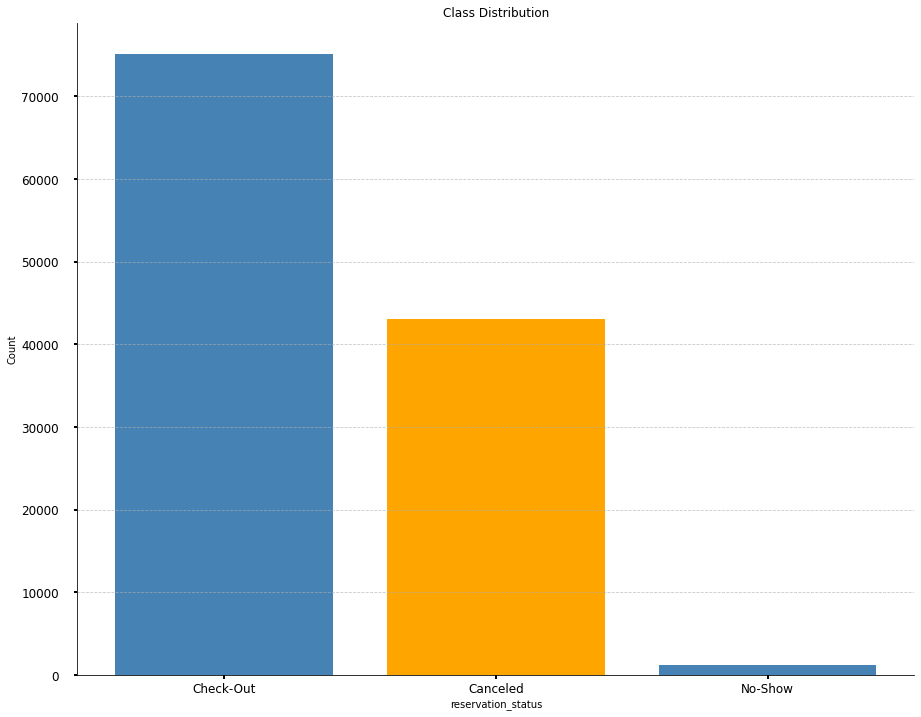

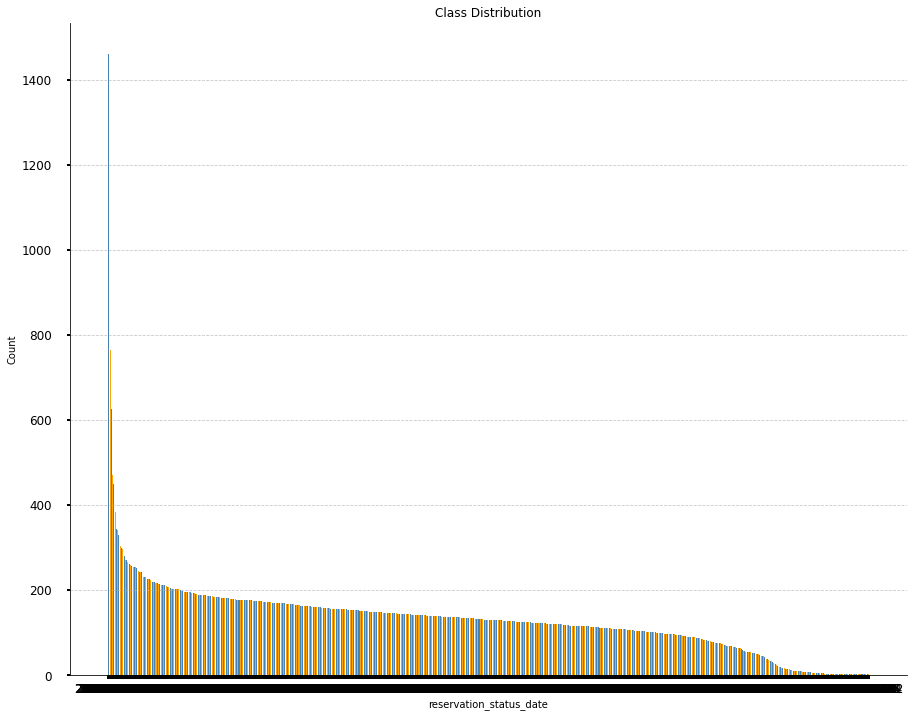

In [ ]:

for r in range(32):
  col = df.columns[r]
  class_counts = df[col].value_counts()
  fig, ax = plt.subplots(figsize=(15, 12))
  ax.bar(class_counts.index, class_counts.values, color=['steelblue', 'orange'])
  ax.set_title('Class Distribution')
  ax.set_xlabel(col)
  ax.set_ylabel('Count')

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.tick_params(axis='both', which='major', labelsize=12, width=2)
  ax.tick_params(axis='y', which='major', pad=15)
  ax.grid(axis='y', linestyle='--', alpha=0.7)

  plt.show()

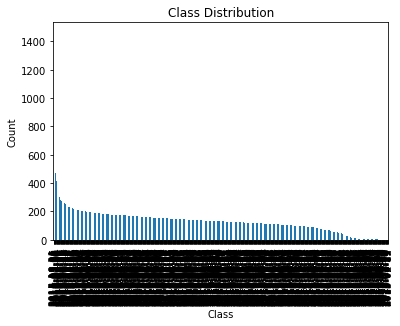

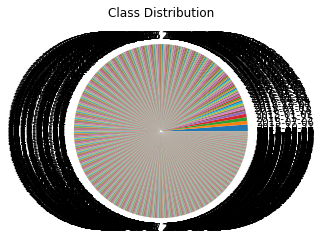

In [ ]:

class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_counts.plot(kind='pie')
plt.title('Class Distribution')
plt.show()

<ipython-input-15-7f0b8495ae3c>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=axs, bins=10, color='steelblue', edgecolor='white', linewidth=1.2)


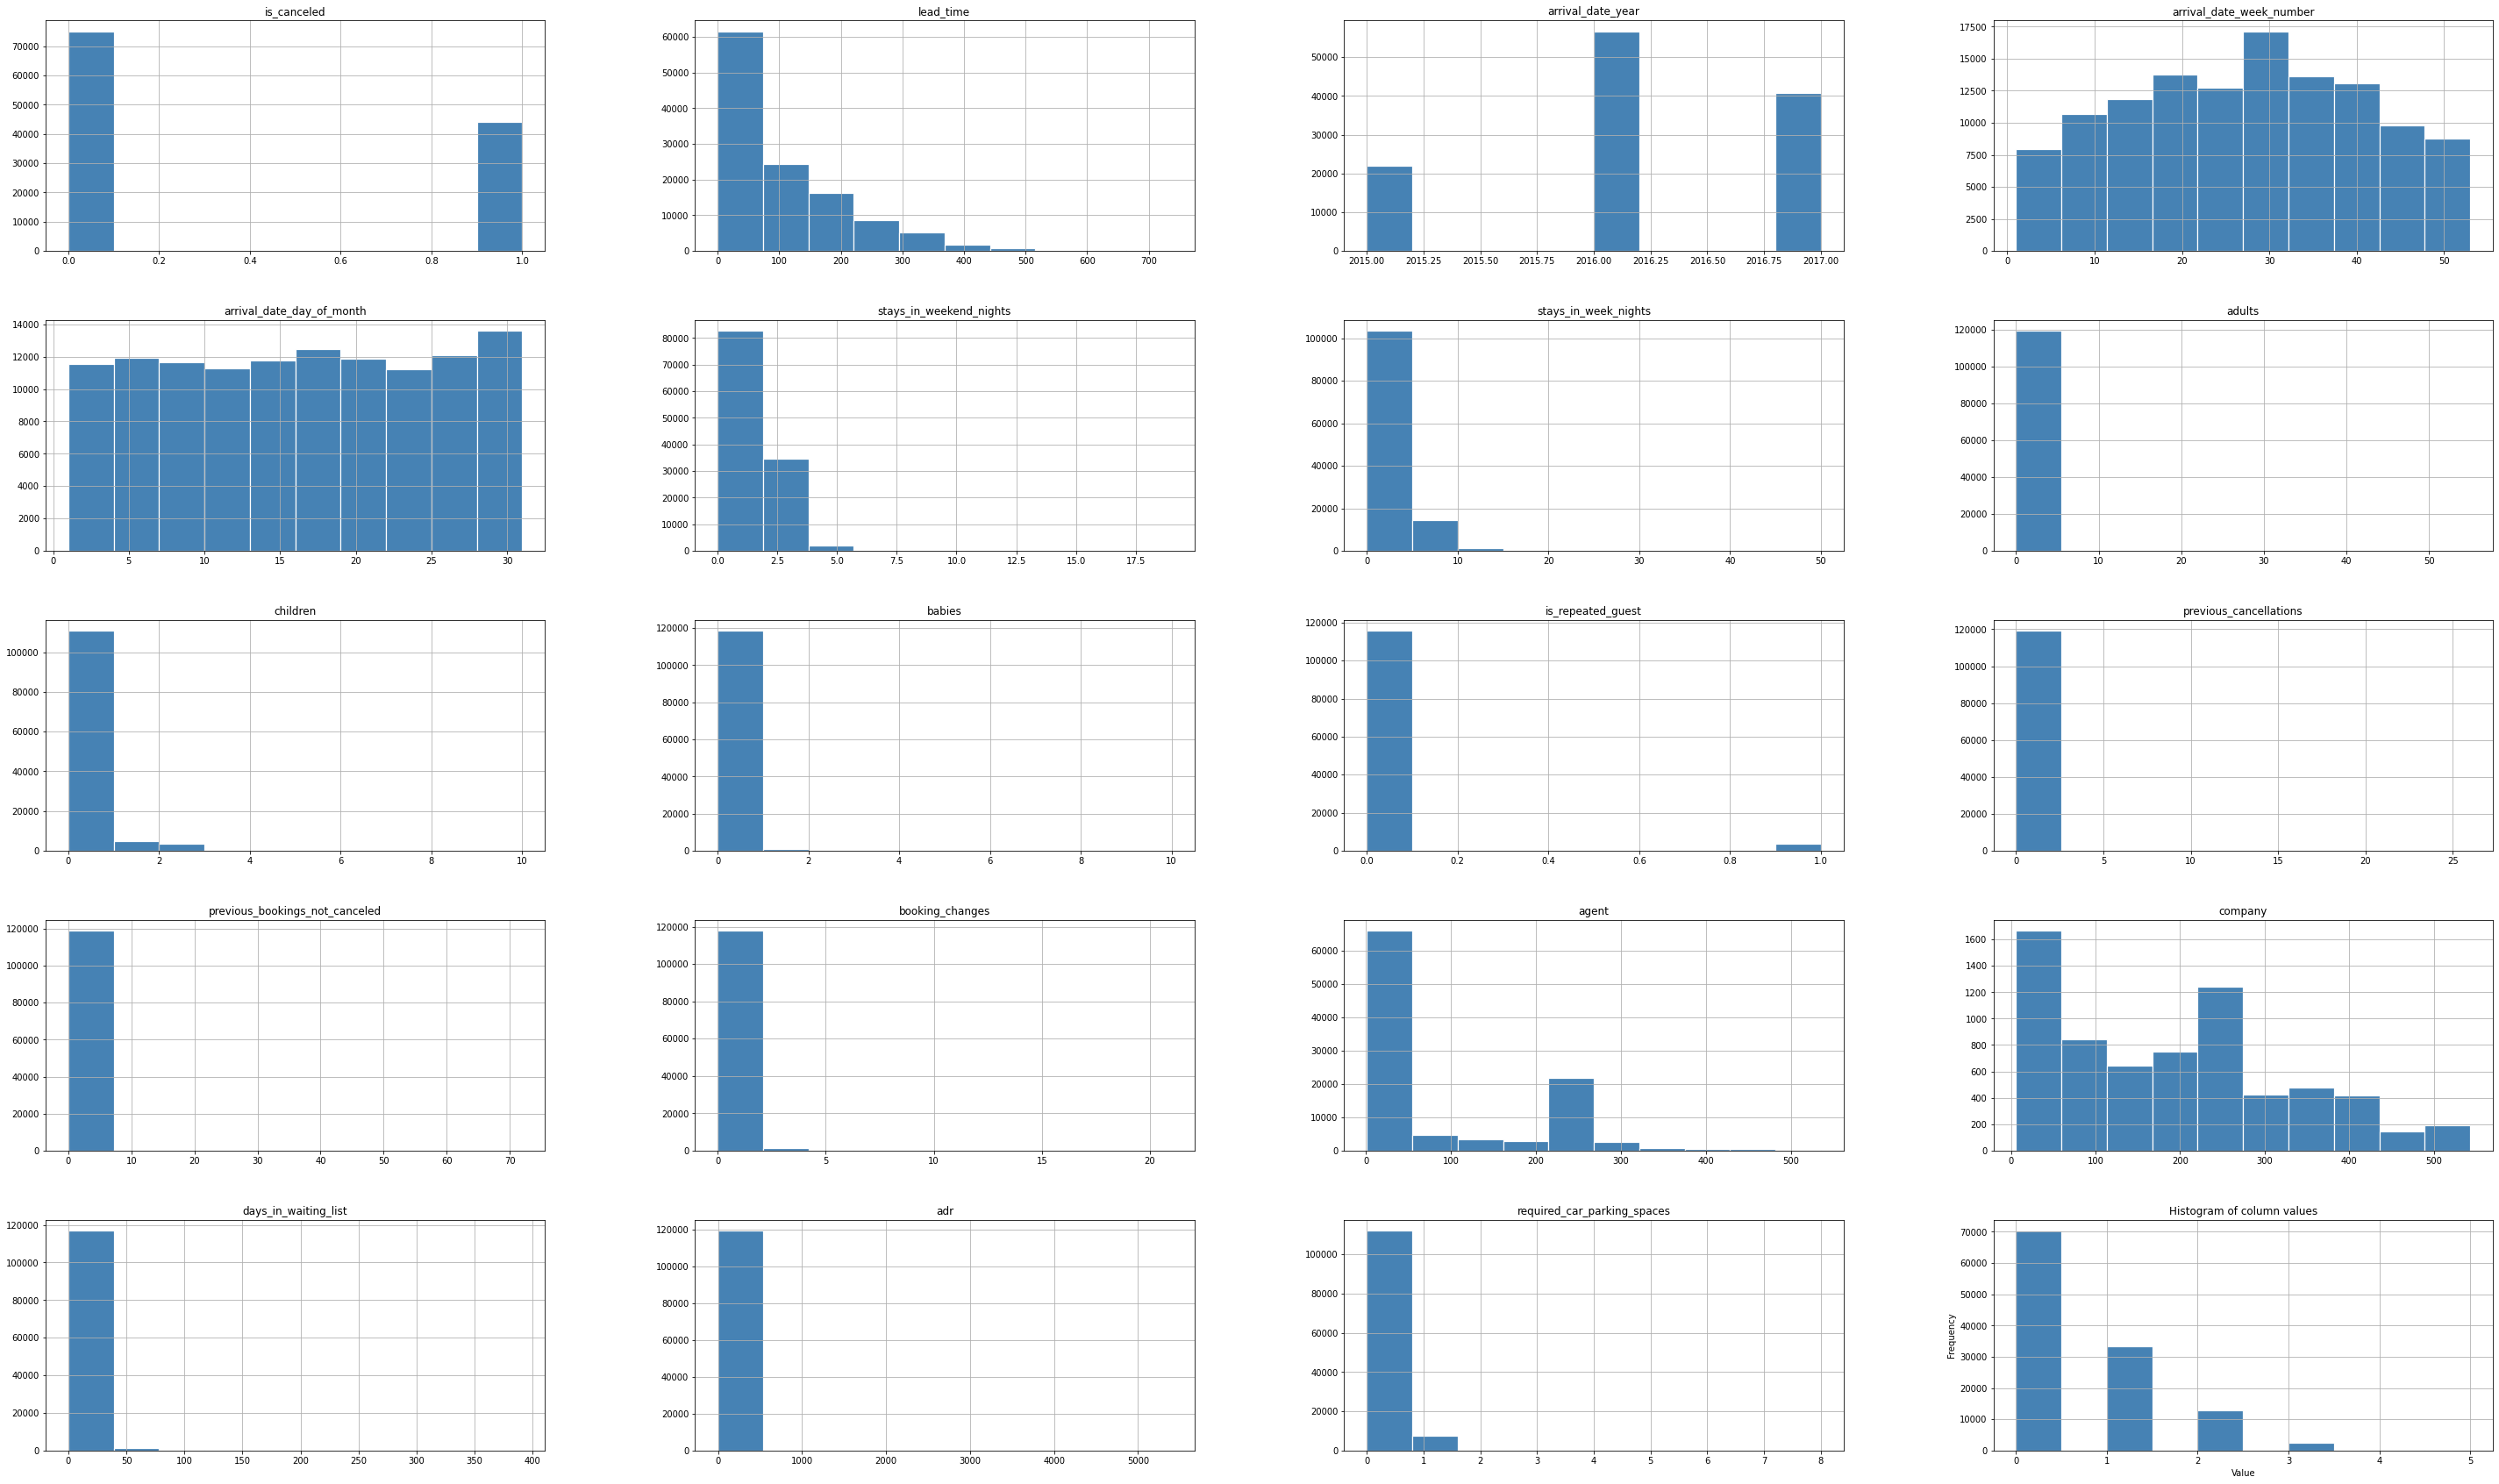

In [ ]:

fig, axs = plt.subplots(figsize=(50, 30))

df.hist(ax=axs, bins=10, color='steelblue', edgecolor='white', linewidth=1.2)
plt.title('Histogram of column values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Since there aren't many correlations between the columns, and the number of cancelled and non-cancelled bookings are not that far off, shouldn't have any imbalancy issue. 

The types of guests and their numbers looks very skewed towards certain value but those should be normal numbers in real-world setting. The same thing happening with `stays_in_weekend_nights` and `stays_in_week_nights`.

The `reservation_status` columns shows very little `No show` data. Might want to do something about this if it happens to be an important indicator for the predictive model.

In [ ]:
def get_relative_entropy(df):
    total_bookings = df["is_canceled"].count()
    total_cancelations = df["is_canceled"].sum()
    relative_entropy = entropy([total_cancelations/total_bookings, (total_bookings - total_cancelations)/total_bookings], base=2)
    return relative_entropy

In [ ]:
get_relative_entropy(df)

0.9509911894723302

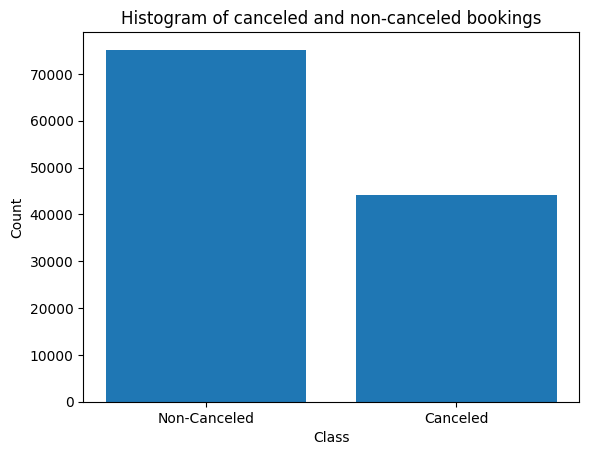

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

non_canceled_count = df[df["is_canceled"] == 0].shape[0]
canceled_count = df[df["is_canceled"] == 1].shape[0]

count_df = pd.DataFrame({"class": ["Non-Canceled", "Canceled"], "count": [non_canceled_count, canceled_count]})

plt.bar(count_df["class"], count_df["count"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Histogram of canceled and non-canceled bookings")
plt.show()

In [7]:
canceled_count / non_canceled_count # imbalance ratio

0.5883511161961525